<a href="https://colab.research.google.com/github/shruthisagar/dl_assignments/blob/main/DeepLearningAssiginment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
 
from keras.datasets import imdb


In [ ]:
# LOAD IMDB DATA

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)
# my_data = imdb.load_data(
# num_words=10000)

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*100)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


In [ ]:
# See an actual review in words
# Reverse from integers to words using the DICTIONARY (given by keras...need to do nothing to create it)

word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[123]])

print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step
? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


In [ ]:
# VECTORIZE as one cannot feed integers into a NN 
# Encoding the integer sequences into a binary matrix - one hot encoder basically
# From integers representing words, at various lengths - to a normalized one hot encoded tensor (matrix) of 10k columns

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [ ]:
# VECTORIZE the labels too - NO INTEGERS only floats into a tensor...(rare exceptions)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [ ]:
# Set a VALIDATION set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [ ]:
# NN MODEL

# Use of DROPOUT
model = models.Sequential()
# Hidden layer 1
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Hidden layer 2
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

# Hidden layer 3
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softsign'))


# Use of REGULARIZATION
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(l2=0.001),activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(l2=0.001),activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# REGULARIZERS L1 L2
# regularizers.l1(0.001)
regularizers.l2(0.001)
# regularizers.l1_l2(l1=0.001, l2=0.001)

# OPTIMIZERS
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# FIT / TRAIN model

NumEpochs = 10
BatchSize = 512

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/10
30/30 [==============================] - 2s 43ms/step - loss: 0.6468 - accuracy: 0.7075 - val_loss: 0.4555 - val_accuracy: 0.8702
Epoch 2/10
30/30 [==============================] - 1s 19ms/step - loss: 0.4008 - accuracy: 0.8971 - val_loss: 0.3732 - val_accuracy: 0.8817
Epoch 3/10
30/30 [==============================] - 1s 20ms/step - loss: 0.3078 - accuracy: 0.9232 - val_loss: 0.3563 - val_accuracy: 0.8765
Epoch 4/10
30/30 [==============================] - 1s 20ms/step - loss: 0.2633 - accuracy: 0.9318 - val_loss: 0.3303 - val_accuracy: 0.8898
Epoch 5/10
30/30 [==============================] - 1s 20ms/step - loss: 0.2351 - accuracy: 0.9443 - val_loss: 0.3375 - val_accuracy: 0.8853
Epoch 6/10
30/30 [==============================] - 1s 19ms/step - loss: 0.2203 - accuracy: 0.9504 - val_loss: 0.3390 - val_accuracy: 0.8855
Epoch 7/10
30/30 [==============================] - 1s 19ms/step - loss: 0.2029 - accuracy: 0.9574 - val_loss: 0.3522 - val_accuracy: 0.8807
Epoch 8/10
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

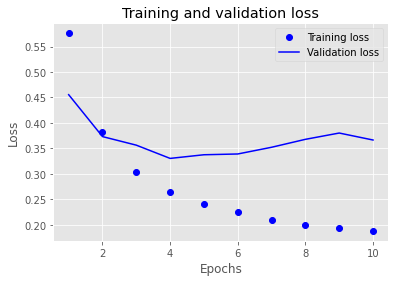

In [ ]:
# VALIDATION LOSS curves

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

{'loss': [0.5760955214500427, 0.38193461298942566, 0.30311718583106995, 0.26363009214401245, 0.24105864763259888, 0.22439135611057281, 0.210023894906044, 0.2005380243062973, 0.19330404698848724, 0.18795455992221832], 'accuracy': [0.7875333428382874, 0.8968666791915894, 0.920199990272522, 0.930400013923645, 0.9380666613578796, 0.9446666836738586, 0.9513333439826965, 0.9550666809082031, 0.9577999711036682, 0.9593333601951599], 'val_loss': [0.455471932888031, 0.37317854166030884, 0.35634443163871765, 0.33034181594848633, 0.3375047743320465, 0.33902281522750854, 0.35220035910606384, 0.3677874505519867, 0.38015151023864746, 0.3664452135562897], 'val_accuracy': [0.870199978351593, 0.8816999793052673, 0.8765000104904175, 0.8898000121116638, 0.8852999806404114, 0.8855000138282776, 0.8806999921798706, 0.8791999816894531, 0.8730000257492065, 0.8802000284194946]}


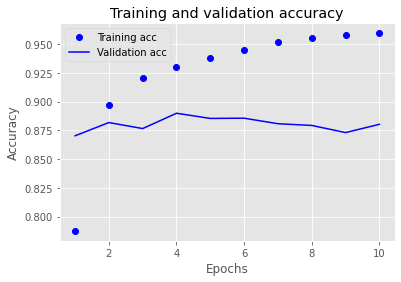

In [ ]:
# VALIDATION ACCURACY curves

plt.clf()
print(history_dict)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# PREDICT

model.predict(x_test)

array([[0.15733865],
       [0.9991614 ],
       [0.7762356 ],
       ...,
       [0.02678961],
       [0.05889934],
       [0.5907231 ]], dtype=float32)